In [2]:
import pandas as pd
import matplotlib.pyplot as plt
 
data = pd.read_csv('Reliance_stock_data.csv', parse_dates=['Date'], index_col='Date')
print(data)

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2010-01-04   498.814209   498.814209   467.155457   491.682404   438.932220   
2010-01-05   525.695618   525.695618   487.065033   489.488007   436.973328   
2010-01-06   493.693939   500.368591   489.465149   497.397003   444.033752   
2010-01-07   497.397003   509.740479   492.825348   505.648834   451.400238   
2010-01-08   506.540314   509.191895   501.054321   504.323059   450.216705   
...                 ...          ...          ...          ...          ...   
2023-12-22  2559.600098  2580.899902  2547.649902  2565.050049  2556.373779   
2023-12-26  2568.000000  2591.949951  2562.699951  2578.050049  2569.329834   
2023-12-27  2582.000000  2599.899902  2573.100098  2586.850098  2578.100098   
2023-12-28  2589.800049  2612.000000  2586.850098  2605.550049  2596.736816   
2023-12-29  2611.100098  2614.000000  2579.300049  2

In [3]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,498.814209,498.814209,467.155457,491.682404,438.932220,38323043
2010-01-05,525.695618,525.695618,487.065033,489.488007,436.973328,10696412
2010-01-06,493.693939,500.368591,489.465149,497.397003,444.033752,11845880
2010-01-07,497.397003,509.740479,492.825348,505.648834,451.400238,13098960
2010-01-08,506.540314,509.191895,501.054321,504.323059,450.216705,7555074


In [4]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-22,2559.600098,2580.899902,2547.649902,2565.050049,2556.373779,8270892
2023-12-26,2568.000000,2591.949951,2562.699951,2578.050049,2569.329834,3732832
2023-12-27,2582.000000,2599.899902,2573.100098,2586.850098,2578.100098,4602078
2023-12-28,2589.800049,2612.000000,2586.850098,2605.550049,2596.736816,6151318
2023-12-29,2611.100098,2614.000000,2579.300049,2584.949951,2576.206299,5432292


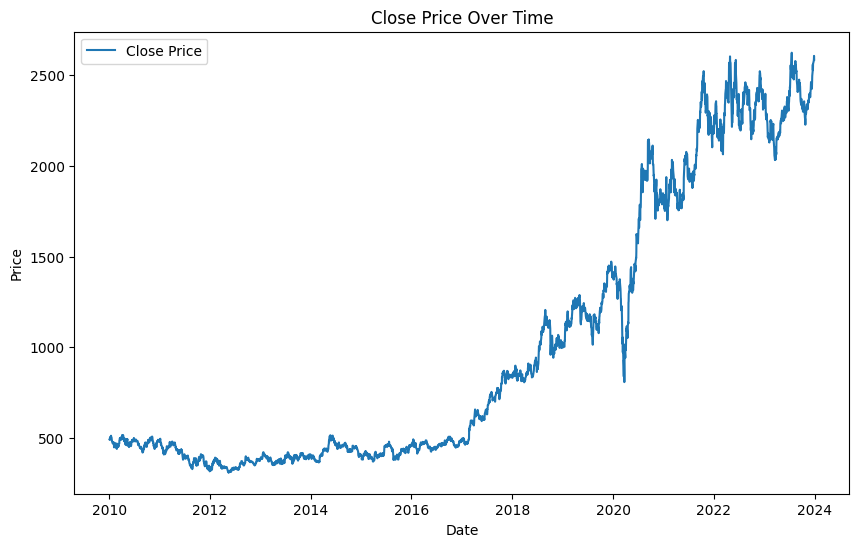

In [ ]:
#time series analysis done on the closing price aganist date
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Close Price')
plt.title('Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [ ]:
#Checking for Stationarity
from statsmodels.tsa.stattools import adfuller
#first augumented Dickey Fuller test result to p-value greater than 0.05
result = adfuller(data['Close'])
print('ADF Statistic:' , result[0]) 
#Result higher than 0.05, will be running a first order differencing

ADF Statistic: 0.5217598230105357


<Axes: title={'center': 'First-Order Differenced Time Series'}, xlabel='Date'>

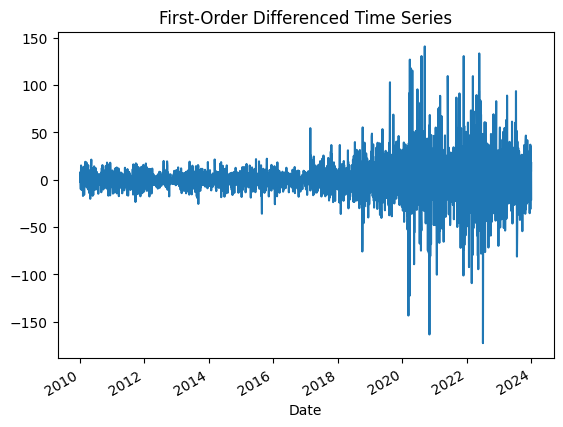

In [7]:
#First order differencing 
data['First_diff'] = data['Close'].diff()
data = data.dropna()
data['First_diff'].plot(title = 'First-Order Differenced Time Series')

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data['First_diff'])
print('ADF Statistic:' , result[0])
#Result lower than 0.05, hance the dataset is now stattionary.

ADF Statistic: -10.567384807015944


<function matplotlib.pyplot.show(close=None, block=None)>

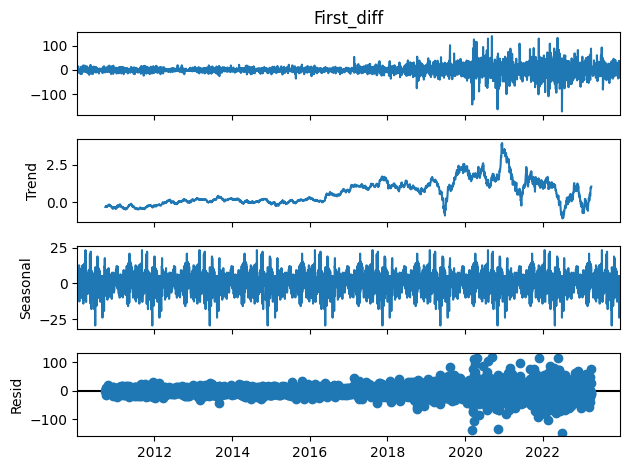

In [9]:
#checking for seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data['First_diff'], model='additive', period=365)
decomposition.plot()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

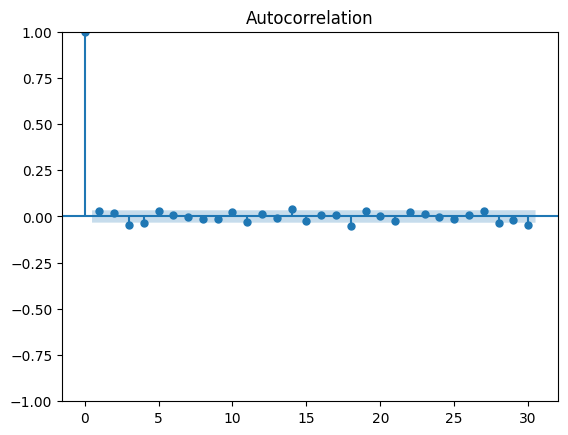

In [ ]:
#checking for autocorrelation
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data['First_diff'].dropna(), lags = 30)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

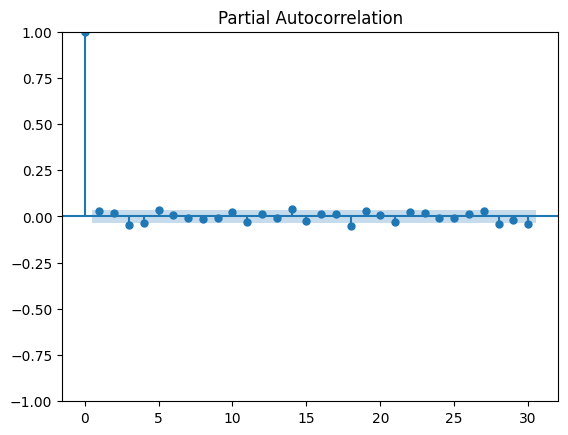

In [ ]:
#Checking for partial autocorrelation
plot_pacf(data['First_diff'].dropna(), lags = 30)
plt.show

In [ ]:
#Building the Forecasting Models
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data['First_diff'], order = (1, 1, 1))
model_fit = model.fit()

print(model_fit.summary())

c:\Users\Kanyinsola\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Kanyinsola\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Kanyinsola\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             First_diff   No. Observations:                 3453
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -15329.427
Date:                Mon, 11 Nov 2024   AIC                          30664.855
Time:                        19:07:49   BIC                          30683.295
Sample:                             0   HQIC                         30671.441
                               - 3453                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0281      0.010      2.735      0.006       0.008       0.048
ma.L1         -0.9994      0.001  -1418.089      0.000      -1.001      -0.998
sigma2       420.5879      4.064    103.479      0.0

c:\Users\Kanyinsola\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Kanyinsola\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


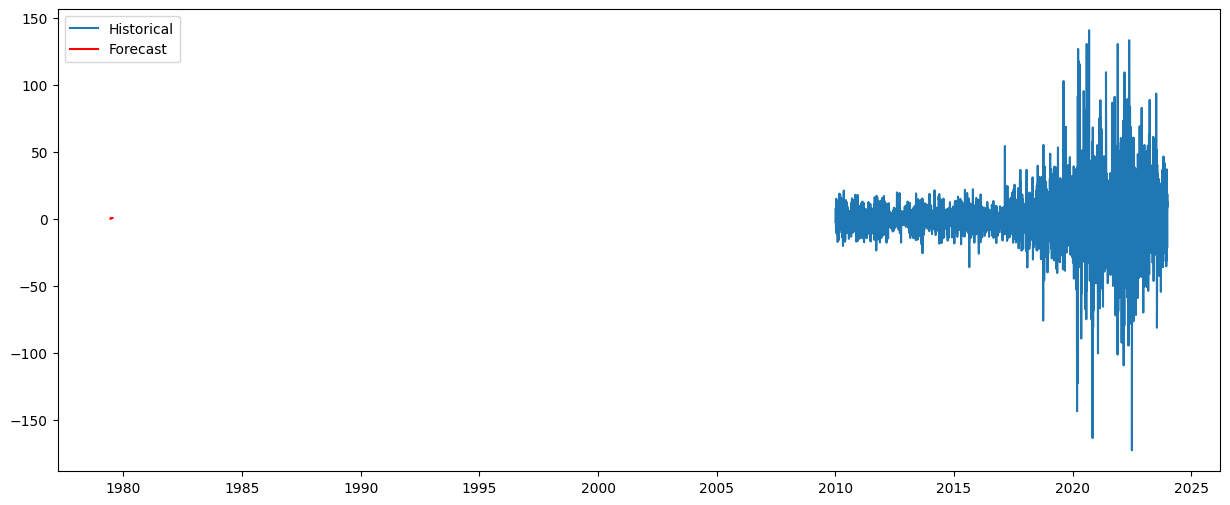

In [16]:
forecast = model_fit.forecast(steps = 30)
plt.figure(figsize= (15,6))
plt.plot(data['First_diff'], label='Historical')
plt.plot(forecast, label='Forecast', color='red')
plt.legend()
plt.show()


In [ ]:
#Evaluation of Model Performance
from sklearn.metrics import mean_squared_error
import numpy as np
#calculate RMSE
rmse = np.sqrt(mean_squared_error(data['First_diff'][-30:], forecast))
print('RMSE:', rmse)

RMSE: 19.72447547558689
